## Load car data

In [1]:
from __future__ import print_function, division
import pandas as pd

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/yunwang/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/yunwang/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [2]:
D=pd.read_csv('/Users/yunwang/downloads/cars.csv')

In [3]:
D.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(D.corr())
plt.show()

<Figure size 640x480 with 2 Axes>

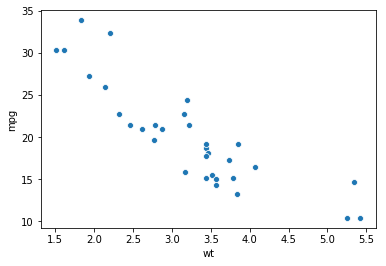

In [5]:
sns.scatterplot(x="wt",y='mpg',data=D)

## Linear Regression in Statsmodels

In [6]:
import statsmodels.api as sm 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
# choose mpg as your y, and other variable as your features. 
y=D['mpg']
x=D['wt']

In [8]:
# Note the difference in argument order

model=sm.OLS(y,x).fit()
predictions=model.predict(x)

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     79.58
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.55e-10
Time:                        22:50:29   Log-Likelihood:                -122.40
No. Observations:                  32   AIC:                             246.8
Df Residuals:                      31   BIC:                             248.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             5.2916      0.593      8.921      0.000       4.082       6.501
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.317
Skew:                           0.189   Prob(JB):                        0.854
Kurtosis:                       2.692   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting the table. 


OLS -- Ordinary Least Squares; y=0.136x 

#### plot the prediction and true y 

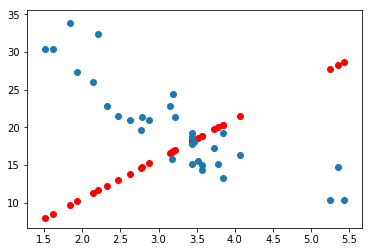

In [10]:
plt.scatter(x,predictions,c='red')
plt.scatter(x,y)
plt.show()

#### Add constant to the model

In [11]:
x=sm.add_constant(x)

In [12]:
x[:5]

,const,wt
0,1.0,2.620
1,1.0,2.875
2,1.0,2.320
3,1.0,3.215
4,1.0,3.440


In [13]:
model_add=sm.OLS(y,x).fit()
predictions_add=model_add.predict(x)
model_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           1.29e-10
Time:                        22:50:29   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### plot the prediction again

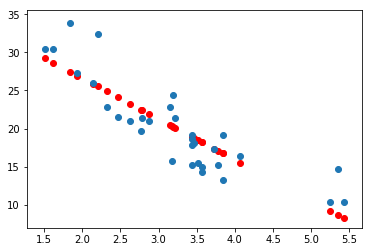

In [14]:
plt.scatter(x['wt'],predictions_add,c='red')
plt.scatter(x['wt'],y)
plt.show()

### Fit a regression model with more than one variables 

In [15]:
x=D[['wt','hp','cyl']] 

In [16]:
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           1.47e-09
Time:                        22:50:29   Log-Likelihood:                -118.80
No. Observations:                  32   AIC:                             243.6
Df Residuals:                      29   BIC:                             248.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             0.7077      2.979      0.238      0.814      -5.386       6.801
hp            -0.1067      0.046     -2.309      0.028      -0.201      -0.012
cyl            5.0224      1.979      2.538      0.017       0.975       9.070
==============================================================================
Omnibus:                        4.461   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                2.006
Skew:                           0.281   Prob(JB):                        0.367
Kurtosis:                       1.910   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     50.17
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           2.18e-11
Time:                        22:50:30   Log-Likelihood:                -72.738
No. Observations:                  32   AIC:                             153.5
Df Residuals:                      28   BIC:                             159.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7518      1.787     21.687      0.000      35.092      42.412
wt            -3.1670      0.741     -4.276      0.000      -4.684      -1.650
hp            -0.0180      0.012     -1.519      0.140      -0.042       0.006
cyl           -0.9416      0.551     -1.709      0.098      -2.070       0.187
==============================================================================
Omnibus:                        5.519   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.220
Skew:                           0.870   Prob(JB):                        0.121
Kurtosis:                       3.369   Cond. No.                         662.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear regression in Scikit-learn 

Scikit Learn is the golden standard about machine learning 

#### linear_model prediction 

In [18]:
from sklearn import linear_model
import numpy as np

In [19]:
y=np.array(D['mpg']).reshape(-1,1)
D=D.drop(['mpg','Car'],axis=1)
x=np.array(D.values)



In [20]:
lm=linear_model.LinearRegression()
model=lm.fit(x,y)

In [21]:
predictions=lm.predict(x)

In [28]:
x.shape

(32, 10)

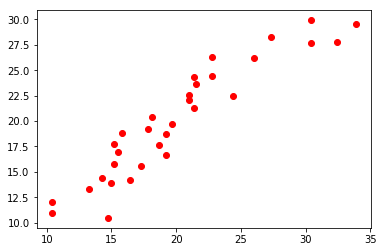

In [30]:
plt.scatter(y,predictions,c='red')
plt.show()

#### lm.score (x,y) returns R2 score of our model

In [31]:
lm.score(x,y)

0.8690157644777646

#### lm.coef_ returns coefficients for each predictors 

In [33]:
lm.coef_

array([[-0.11144048,  0.01333524, -0.02148212,  0.78711097, -3.71530393,
         0.82104075,  0.31776281,  2.52022689,  0.65541302, -0.19941925]])

#### lm.intercept_ returns the interceptions 

In [34]:
lm.intercept_

array([12.30337416])